# <font color = 545AA7> Independent Component Analysis (ICA) </font>

The goal is to generate three different signals with noise, combine them, and independent component analysis to seperate out the three signals. When combining the signals, there are three different combindations as different relative ratios of the three signals. This mimics the idea of three microphones are in a room recording three instruments playing at the same time. Each microphone will pick up all three instruments but in different ratios depending upon how close or far each is from the different instruments.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import os

from sklearn.decomposition import FastICA
import numpy as np

## <font color = 545AA7> Generate Mixed Signal </font>

Three independant signals with random noise mixed in (S1, S2, and S3) were generated and three mixed signals (S) were generated by adding different ratios of the three independant signals together.

In [12]:
data_pure = []
data_mix = []

clip = 300

for file in os.listdir():
    if file.lower().endswith('pure.csv'):
        data_pure.append(np.loadtxt(file, delimiter=',')[clip:,1])
        
        #print(file)
    elif file.lower().endswith('csv') and file.lower().startswith('mix'):
        data_mix.append(np.loadtxt(file, delimiter=',')[clip:,1])

wavenumbers = np.loadtxt(file, delimiter=',')[clip:,0]        
        
data_array_pure = np.vstack(data_pure).T
data_array_mix = np.vstack(data_mix).T

S_pure = np.ndarray.astype(data_array_pure, float) #recast strings as floats
S = np.ndarray.astype(data_array_mix, float) #recast strings as floats

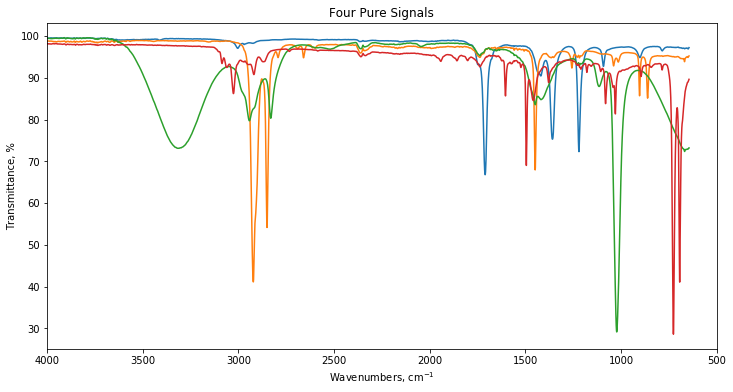

In [10]:
fig0 = plt.figure(figsize=(12,6))
ax0 = fig0.add_subplot(1,1,1)
wn = np.array(wavenumbers).T
ax0.plot(wn, S_pure[:,0], wn, S_pure[:,1], wn, S_pure[:,2], wn, S_pure[:,3])

plt.gca().invert_xaxis()
plt.title('Four Pure Signals')
plt.xlabel('Wavenumbers, cm$^{-1}$')
plt.ylabel('Transmittance, %')
plt.xlim(4000,500)

#plt.savefig('four_pure_IR_signals.png', format='png', dpi=300)

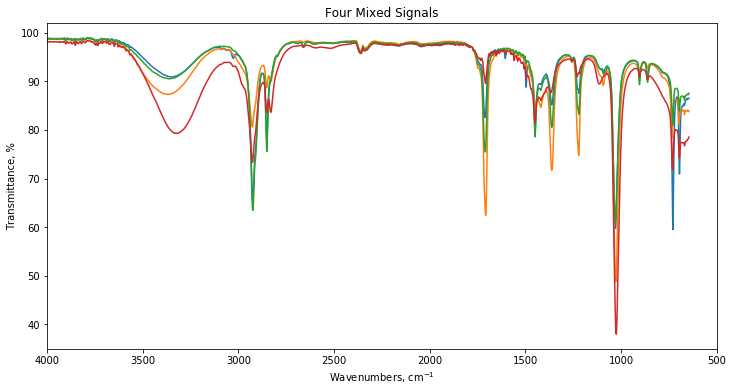

In [11]:
fig0 = plt.figure(figsize=(12,6))
ax0 = fig0.add_subplot(1,1,1)
wn = np.array(wavenumbers).T
ax0.plot(wn, S[:,0], wn, S[:,1], wn, S[:,2], wn, S[:,3])

plt.gca().invert_xaxis()
plt.title('Four Mixed Signals')
plt.xlabel('Wavenumbers, cm$^{-1}$')
plt.ylabel('Transmittance, %')
plt.xlim(4000,500)

#plt.savefig('four_mixed_IR_signals.png', format='png', dpi=300)

In [5]:
ica = FastICA(n_components=4)
S_fit = ica.fit_transform(S)
S_fit.shape

(6961, 4)

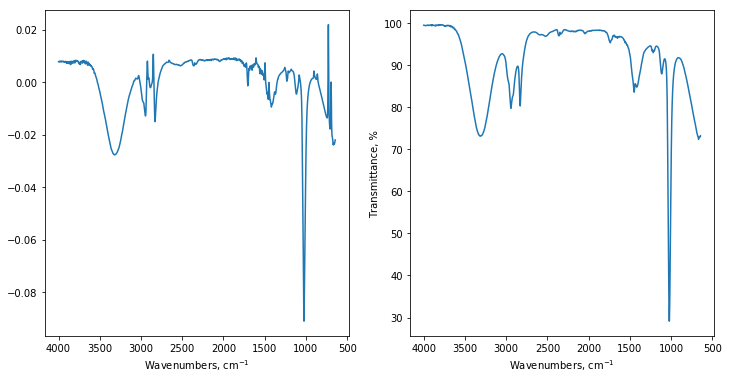

In [31]:
fig1 = plt.figure(figsize=(12,6))
ax1 = fig1.add_subplot(1,2,1)
ax1.plot(wn, S_fit[:,3])
plt.xlabel('Wavenumbers, cm$^{-1}$')
#plt.ylabel('Transmittance, %')
plt.gca().invert_xaxis()

ax2 = fig1.add_subplot(1,2,2)
ax2.plot(wn, S_pure[:,2])
plt.xlabel('Wavenumbers, cm$^{-1}$')
plt.ylabel('Transmittance, %')
plt.gca().invert_xaxis()

#plt.savefig('methanol_matched.png', format='png', dpi=300)

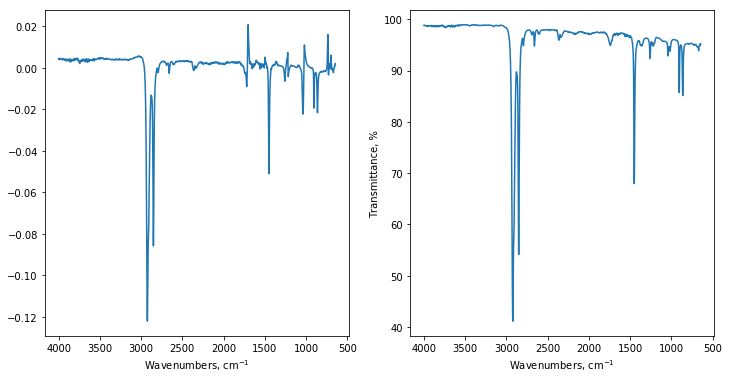

In [32]:
fig2 = plt.figure(figsize=(12,6))
ax1 = fig2.add_subplot(1,2,1)
ax1.plot(wn, S_fit[:,2])
plt.xlabel('Wavenumbers, cm$^{-1}$')
#plt.ylabel('Transmittance, %')
plt.gca().invert_xaxis()

ax2 = fig2.add_subplot(1,2,2)
ax2.plot(wn, S_pure[:,1])
plt.xlabel('Wavenumbers, cm$^{-1}$')
plt.ylabel('Transmittance, %')
plt.gca().invert_xaxis()

#plt.savefig('toluene.png', format='png', dpi=300)

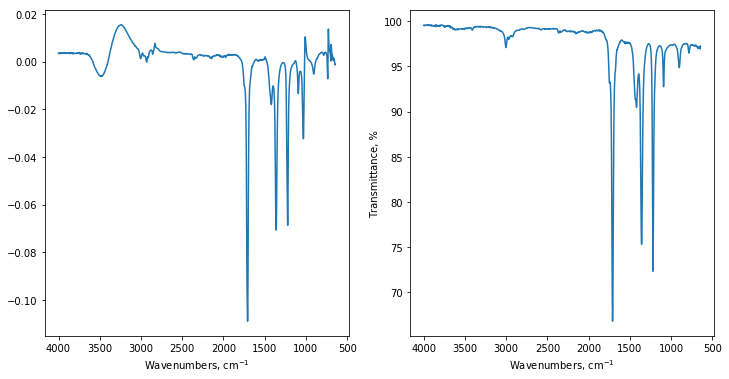

In [33]:
fig3 = plt.figure(figsize=(12,6))
ax1 = fig3.add_subplot(1,2,1)
ax1.plot(wn, S_fit[:,0])
plt.xlabel('Wavenumbers, cm$^{-1}$')
#plt.ylabel('Transmittance, %')
plt.gca().invert_xaxis()

ax2 = fig3.add_subplot(1,2,2)
ax2.plot(wn, S_pure[:,0])
plt.xlabel('Wavenumbers, cm$^{-1}$')
plt.ylabel('Transmittance, %')
plt.gca().invert_xaxis()

#plt.savefig('acetone.png', format='png', dpi=300)

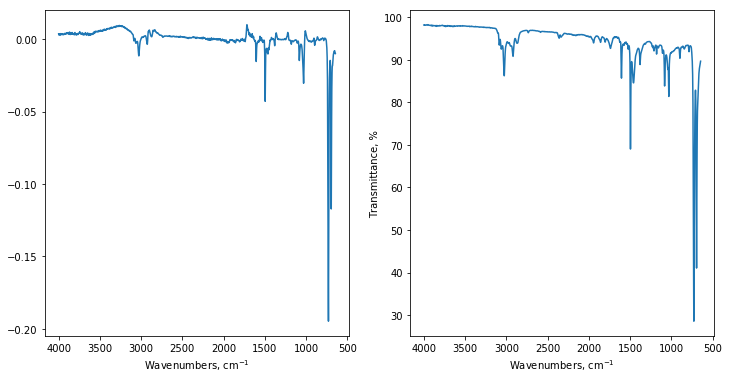

In [34]:
fig4 = plt.figure(figsize=(12,6))
ax1 = fig4.add_subplot(1,2,1)
ax1.plot(wn, S_fit[:,1])
plt.xlabel('Wavenumbers, cm$^{-1}$')
#plt.ylabel('Transmittance, %')
plt.gca().invert_xaxis()

ax2 = fig4.add_subplot(1,2,2)
ax2.plot(wn, S_pure[:,3])
plt.xlabel('Wavenumbers, cm$^{-1}$')
plt.ylabel('Transmittance, %')
plt.gca().invert_xaxis()

#plt.savefig('cyclohexane_matched.png', format='png', dpi=300)

## <font color = 545AA7> References </font>

1. http://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html#sphx-glr-auto-examples-decomposition-plot-ica-blind-source-separation-py